In [1]:
from lif import LIFLayer
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

def get_mean_activation_with_weights(weights: torch.Tensor, device: torch.device, runtime: float = 1.0, dt = 1e-3) -> float:
    T: int = int(runtime / dt)
    lif_layer: LIFLayer = LIFLayer(weights=weights.to(device), dt=dt, device=device)
    input_current: float = 1
    activation: torch.Tensor = torch.zeros(size=(1,), device=device) 
    for t in range(T):
        lif_layer(torch.tensor(input_current).to(device))
        if t > t // 2:
            activation += lif_layer.activation
    return 2 * activation / T

N: int = 5
Trials: int = 100
MaxWeight: float = 2.0
data = torch.zeros(size=(Trials,2), device=device) 
for trial in tqdm(range(Trials)):
    weights = torch.rand(size=(N,), dtype=torch.float32, device=device)
    activation = get_mean_activation_with_weights(weights, device)
    data[trial] = torch.tensor([weights.sum(), activation], device=device)
data = data.cpu()


Using device: cpu


  0%|          | 0/100 [00:00<?, ?it/s]

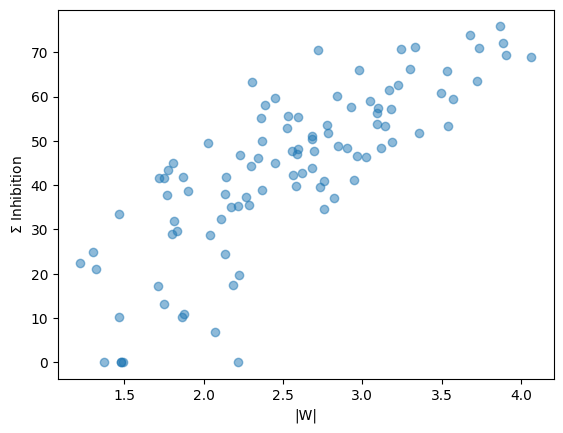

In [2]:
plt.figure()
plt.plot(data[:,0], data[:,1], marker='o', linestyle='None', alpha=0.5)
plt.xlabel('|W|')
plt.ylabel('$\Sigma$ Inhibition')
plt.show()